In [ ]:
# import functions
import keras
import tensorflow as tf
from keras.datasets import mnist # import the function mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout # Dense = Fully Connected layer. #50% par exemple des connexion vont etre desactive danx l apprentissage pour alleger le reseau et eviter le sur apprentissage
#from keras.optimizers import Adam
#from keras.optimizers import adam_v2

from tensorflow.keras.optimizers import Adam #backpropagation ( versio algo MAJ des poids)

import matplotlib.pyplot as plt # shorcut for a plot function

In [ ]:
batch_size = 128 #BATCH  egale a 1 : une seule image dans l entree puis une MAJ  si 2  2 images

# 1 epoch :  un seul passage sur toute la base  epoch egal 100 : 100 passages
num_classes = 10
epochs = 10
input_shape = (32, 32, 3)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #mnist function loads the data


11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4]


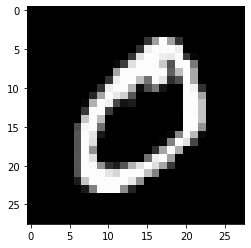

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])#etiquettes 10 premieres images
plt.imshow(x_train[1,:,:], cmap = 'gray') #image d'indice 1 : : 28 28 pixels afffichés

In [ ]:
import numpy as np
from PIL import Image
x_train_re=np.zeros( [x_train.shape[0],32,32,3])
x_test_re=np.zeros( [x_test.shape[0],32,32,3])

for i in range(x_train.shape[0]):
  a = Image.fromarray(x_train[i,:,:])
  a=a.resize((32,32))
  a = a.convert("RGB")
  x_train_re [i,:,:,:]= np.asarray(a)

(10000, 32, 32, 3)
[0. 0. 0.]


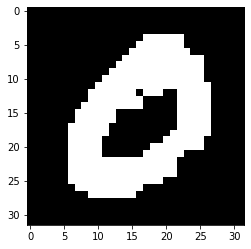

In [ ]:
for j in range(x_test.shape[0]):
  b = Image.fromarray(x_test[j,:,:])
  b=b.resize((32,32))
  b = b.convert("RGB")
  x_test_re [j,:,:,:]= np.asarray(b)
print(x_test_re.shape)
print(x_test_re[0][0][0])
plt.imshow(x_train_re[1,:,:,:])

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

x_train_re = x_train_re.astype('float32') # by default, images are stored as unsigned integers from 0 to 255 (you only need 8 bits)
x_test_re = x_test_re.astype('float32') # by default, all training is done on 'float32'
x_train_re /= 255 # normalisation pour que l intervalle de l image de 0 a 1
x_test_re /= 255
#print(x_train.shape[0], 'train samples') # print first entry of the size
#print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
# one-hot encoding: convert class vectors to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes) # Keras a set of functions in utils. We are using "to_categorical" which is the name for one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

#Pour chaque image on a une valeur alors que RNN sortie vecteur de 10

print(y_train[1,:])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import VGG16

#input_shape = (32, 32, 3)
#import tensorflow as tf
#By specifying the include_top=False argument, you load a network that doesn’t include the classification layers at the top.
#base_model = tf.keras.applications.InceptionV3(input_shape = input_shape, include_top = False, weights = "imagenet")
base_model = tf.keras.applications.VGG16(input_shape = input_shape, include_top = False, weights = "imagenet")

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Model
base_model1 = Model(inputs=base_model.input, outputs=base_model.get_layer('block1_conv2').output)
#base_model1.summary()

In [ ]:
base_model1.trainable=False

In [ ]:
#base_model1.summary()

In [ ]:
from tensorflow.keras import regularizers
model = tf.keras.Sequential([base_model1,
                                 tf.keras.layers.Conv2D(8,3,activation='relu',kernel_regularizer=regularizers.l2(l=0.001),strides=1,padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2,padding='same'),

                                 tf.keras.layers.Conv2D(32,3,activation='relu',kernel_regularizer=regularizers.l2(l=0.001), strides=1, padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2, padding='same'),
                                 tf.keras.layers.Conv2D(64,3,activation='relu',strides=1,kernel_regularizer=regularizers.l2(l=0.001), padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2, padding='same'),
                                 tf.keras.layers.Conv2D(254,3,activation='relu',strides=1, padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2, padding='same'),
                                 tf.keras.layers.Conv2D(512,3,activation='relu',strides=1, padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2, padding='same'),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(64, activation='relu'),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(10, activation="softmax")
                                ])

In [ ]:
model.compile(loss='categorical_crossentropy', #diff entre calculé w desiré : fonction perte
              optimizer=Adam(), metrics=['accuracy'])

#Adam : fonction MAJ poids

In [ ]:
history = model.fit(x_train_re, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1, # means print everything 0 : pas d'affichage 2: plus de details
                    validation_split=0.1) # it runs the model here
model.save('final.h5')


Epoch 1/10
422/422 [==============================] - 15s 13ms/step - loss: 1.6567 - accuracy: 0.5666 - val_loss: 0.2175 - val_accuracy: 0.9638
Epoch 2/10
422/422 [==============================] - 5s 12ms/step - loss: 0.2758 - accuracy: 0.9344 - val_loss: 0.1329 - val_accuracy: 0.9808
Epoch 3/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1462 - accuracy: 0.9768 - val_loss: 0.1148 - val_accuracy: 0.9853
Epoch 4/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1210 - accuracy: 0.9827 - val_loss: 0.1071 - val_accuracy: 0.9868
Epoch 5/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1073 - accuracy: 0.9851 - val_loss: 0.0957 - val_accuracy: 0.9903
Epoch 6/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0953 - accuracy: 0.9879 - val_loss: 0.0947 - val_accuracy: 0.9877
Epoch 7/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0940 - accuracy: 0.9874 - val_loss: 0.1112 - val_accuracy: 0.982

In [ ]:
score = model.evaluate(x_test_re, y_test, verbose=1,batch_size=batch_size)
print('Test loss:', score[0])#evaluate elle retourne 2 valeurs : indice 1: loss indice 2 : Accuracy
print('Test accuracy:', score[1])

79/79 [==============================] - 1s 9ms/step - loss: 0.0979 - accuracy: 0.9864
Test loss: 0.09793060272932053
Test accuracy: 0.9864000082015991


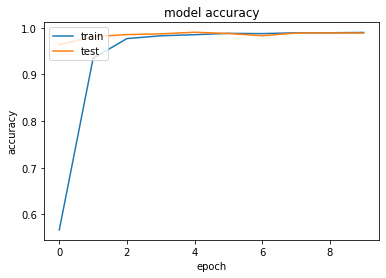

In [ ]:
plt.plot(history.history['accuracy']) # training accuracy pour chaque epoch loss et Accuracy
#accuracy  aprentissage et val-accuracy: validation
plt.plot(history.history['val_accuracy']) # validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

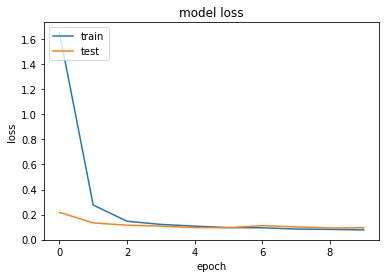

In [ ]:
# summarize history for loss

#loss : erreur entre disiré et calculé
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Fine-tuning**

In [ ]:
base_model1.trainable=True

In [ ]:
from tensorflow.keras import regularizers
model = tf.keras.Sequential([base_model1,
                                 tf.keras.layers.Conv2D(8,3,activation='relu',kernel_regularizer=regularizers.l2(l=0.001),strides=1,padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2,padding='same'),

                                 tf.keras.layers.Conv2D(32,3,activation='relu',kernel_regularizer=regularizers.l2(l=0.001), strides=1, padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2, padding='same'),
                                 tf.keras.layers.Conv2D(64,3,activation='relu',strides=1,kernel_regularizer=regularizers.l2(l=0.001), padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2, padding='same'),
                                 tf.keras.layers.Conv2D(254,3,activation='relu',strides=1, padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2, padding='same'),
                                 tf.keras.layers.Conv2D(512,3,activation='relu',strides=1, padding='same'),
                                 tf.keras.layers.MaxPooling2D((2,2),strides=2, padding='same'),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(64, activation='relu'),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(10, activation="softmax")
                                ])

In [ ]:
model.compile(loss='categorical_crossentropy', #diff entre calculé w desiré : fonction perte
              optimizer=Adam(), metrics=['accuracy'])


In [ ]:
model.load_weights('./final.h5') #chargement du dernier état

In [ ]:
history = model.fit(x_train_re, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1, # means print everything 0 : pas d'affichage 2: plus de details
                    validation_split=0.1) # it runs the model here
model.save('final.h5')

Epoch 1/10
422/422 [==============================] - 7s 15ms/step - loss: 0.0837 - accuracy: 0.9875 - val_loss: 0.0972 - val_accuracy: 0.9865
Epoch 2/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0767 - accuracy: 0.9886 - val_loss: 0.0936 - val_accuracy: 0.9877
Epoch 3/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0688 - accuracy: 0.9902 - val_loss: 0.0982 - val_accuracy: 0.9850
Epoch 4/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0696 - accuracy: 0.9896 - val_loss: 0.0870 - val_accuracy: 0.9897
Epoch 5/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0618 - accuracy: 0.9917 - val_loss: 0.0871 - val_accuracy: 0.9878
Epoch 6/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0661 - accuracy: 0.9905 - val_loss: 0.0846 - val_accuracy: 0.9880
Epoch 7/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0613 - accuracy: 0.9911 - val_loss: 0.0767 - val_accuracy: 0.9895

In [ ]:
score = model.evaluate(x_test_re, y_test, verbose=1,batch_size=batch_size)
print('Test loss:', score[0])#evaluate elle retourne 2 valeurs : indice 1: loss indice 2 : Accuracy
print('Test accuracy:', score[1])

79/79 [==============================] - 1s 7ms/step - loss: 0.0676 - accuracy: 0.9915
Test loss: 0.0675964504480362
Test accuracy: 0.9915000200271606
